In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

import warnings
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/Python work directory/train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].mode()[0]

'Male'

In [8]:
#1 first filling up categorical misising values

df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

<AxesSubplot:xlabel='Gender', ylabel='count'>

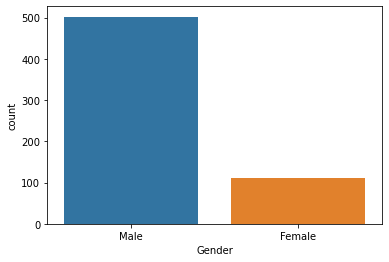

In [9]:
df['Married'].mode()[0]
sns.countplot(x ='Gender', data = df)

In [10]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
df['Married']= df["Married"].fillna(df['Married'].mode()[0])

<AxesSubplot:xlabel='Married', ylabel='count'>

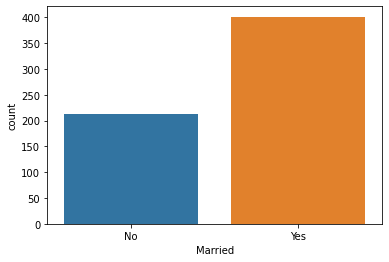

In [12]:
sns.countplot(x ='Married', data = df)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [15]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

<AxesSubplot:xlabel='Dependents', ylabel='count'>

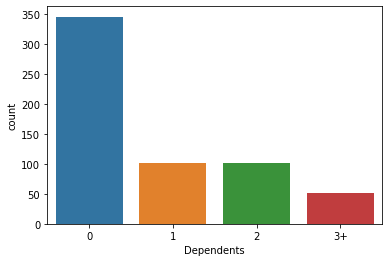

In [16]:
# counting the Dependents for better understanding about the data before filling it up.

sns.countplot(x ='Dependents', data = df)


In [17]:
#as we can see filling with mode make sense here.
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Dependents'].replace('3+',3,inplace=True)

In [18]:
#2 filling numerical values
#we should check for outliers before filling up numerical values.
df['Credit_History'].unique()

array([ 1.,  0., nan])

The percentage of Y class : 0.14
The percentage of N class : 0.77


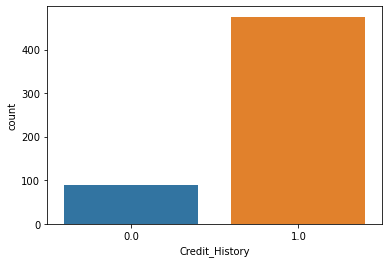

In [19]:
sns.countplot(df['Credit_History'])
print('The percentage of Y class : %.2f' % (df['Credit_History'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Credit_History'].value_counts()[1] / len(df)))

In [20]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


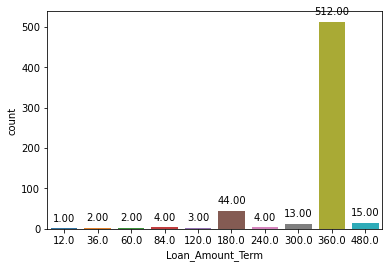

In [21]:
splot = sns.countplot(x ='Loan_Amount_Term', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [22]:
# we can see that 360 has count of 512 so thats why replacing the loan_amount_term by mode will be smarter choice.

df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])


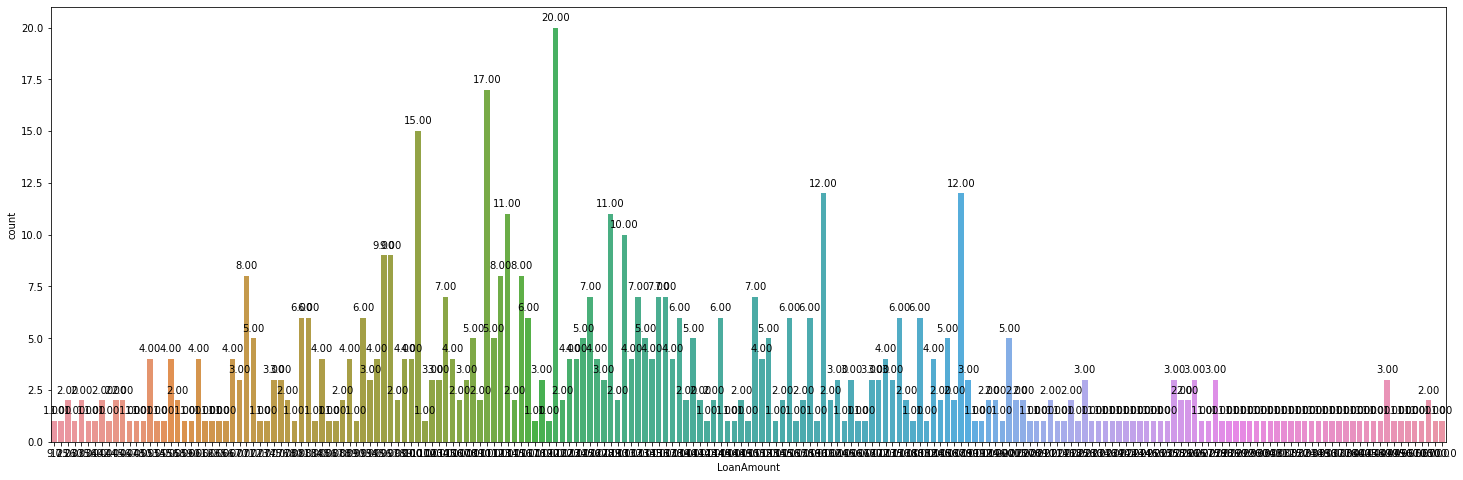

In [23]:
plt.figure(figsize=(25, 8))
splot = sns.countplot(x ='LoanAmount', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


<AxesSubplot:xlabel='LoanAmount'>

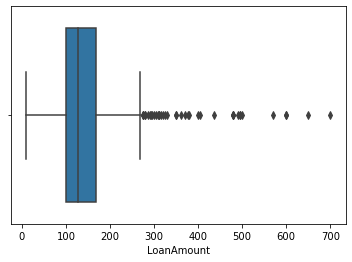

In [24]:
#we can not replace loan amount with mode because here mean or median will be better.
#before making choice beteween mean and median we have to check for outliers.
# because mean is affected by outliers.
sns.boxplot(x="LoanAmount", data=df)


In [25]:
#there is outlier so 
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2.0
up_limit is 270.0


In [26]:
outlier = []
for x in df['LoanAmount']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)


 outlier in the dataset is [349.0, 315.0, 320.0, 286.0, 312.0, 370.0, 650.0, 290.0, 600.0, 275.0, 700.0, 495.0, 280.0, 279.0, 304.0, 330.0, 436.0, 480.0, 300.0, 376.0, 490.0, 308.0, 570.0, 380.0, 296.0, 275.0, 360.0, 405.0, 500.0, 480.0, 311.0, 480.0, 400.0, 324.0, 600.0, 275.0, 292.0, 350.0, 496.0]


In [27]:
len(outlier)

39

In [28]:
#we will not remove the outliers becuase it has 39/592, which means it has 6.5% amount of data in whole.
#we will use median to replace the missing value.
#becuase median is not affected by the outliers.
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

The percentage of Yes class : 0.14
The percentage of No class : 0.86


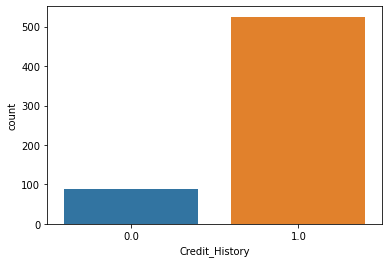

In [30]:
sns.countplot(df['Credit_History'])
print('The percentage of Yes class : %.2f' % (df['Credit_History'].value_counts()[0] / len(df)))
print('The percentage of No class : %.2f' % (df['Credit_History'].value_counts()[1] / len(df)))

The percentage of Yes class : 0.69
The percentage of No class : 0.31


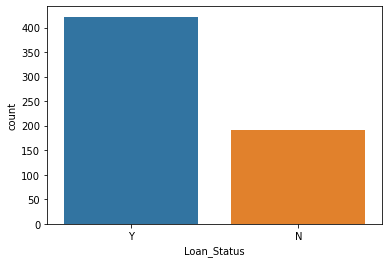

In [31]:
sns.countplot(df['Loan_Status'])
print('The percentage of Yes class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of No class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

In [32]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


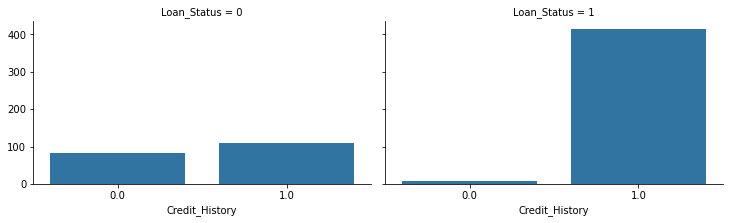

In [34]:
#Credit history vs loan status
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


<AxesSubplot:xlabel='Gender', ylabel='count'>

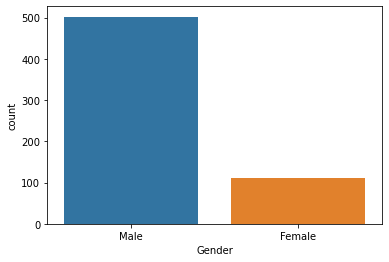

In [35]:
#people having credit history have easy time getting loan

#Gender vs loan status
sns.countplot(x ='Gender', data = df)

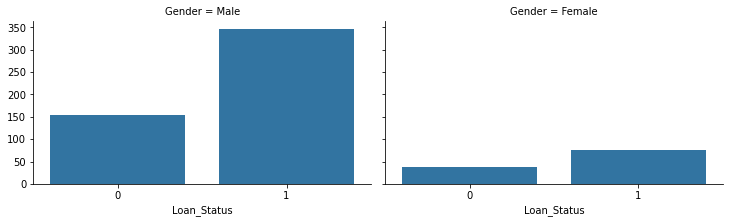

In [36]:
grid = sns.FacetGrid(df,col='Gender', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

In [37]:
# chances for getting loan for female is easier compared to male.
#Loan status clearly depend upon the gender.

<AxesSubplot:xlabel='Married', ylabel='count'>

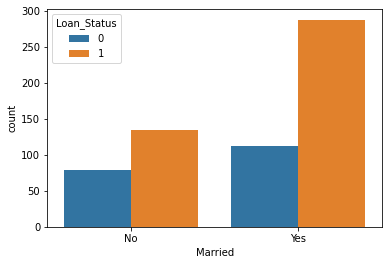

In [38]:
#Married vs loan status
sns.countplot(x='Married', hue='Loan_Status', data=df)

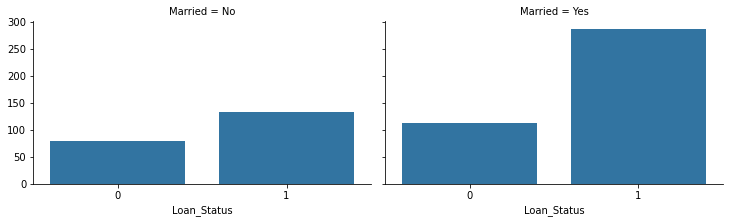

In [39]:
#people who are married have better chance at loan approval

grid = sns.FacetGrid(df,col='Married', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')


<AxesSubplot:xlabel='Dependents', ylabel='count'>

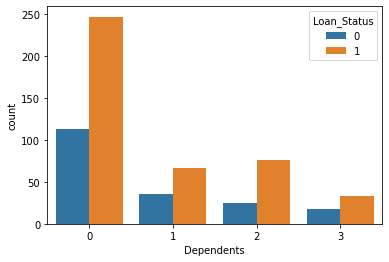

In [40]:
#Dependents vs loan status


#sns.barplot(x='Dependents', y='Loan_Status', data=df)
sns.countplot(x="Dependents", hue="Loan_Status", data=df)

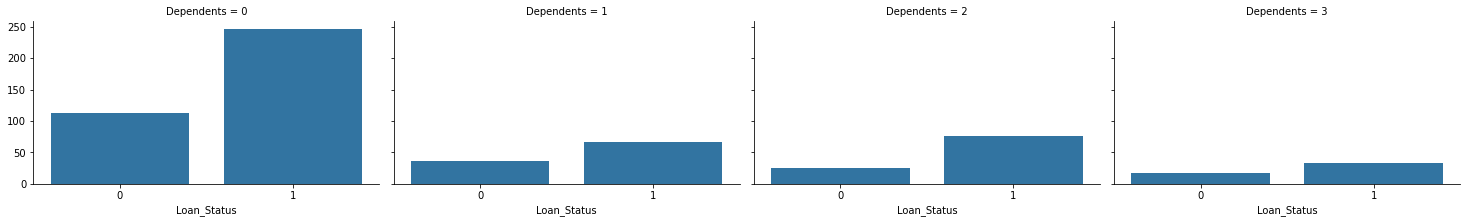

In [41]:
grid = sns.FacetGrid(df,col='Dependents', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

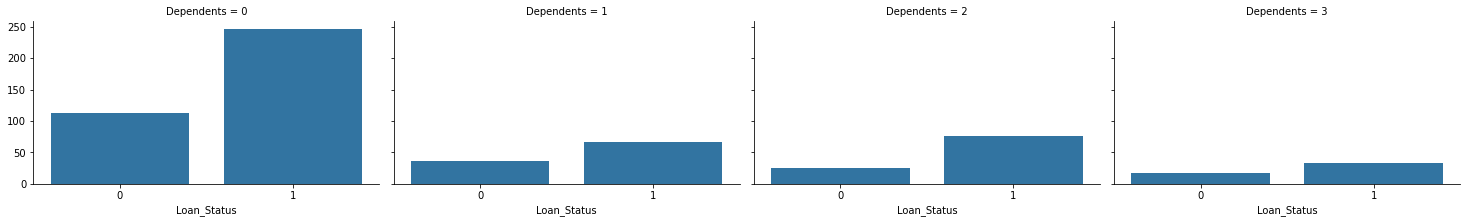

In [42]:
grid = sns.FacetGrid(df,col='Dependents', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

In [43]:
#we should drop the dependents as it has no relation with loan status


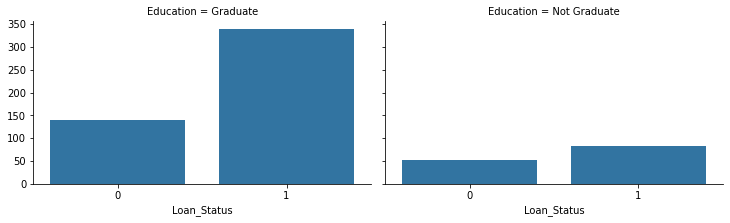

In [44]:
#loan status vs Education
grid = sns.FacetGrid(df,col='Education', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')


<AxesSubplot:xlabel='Education', ylabel='count'>

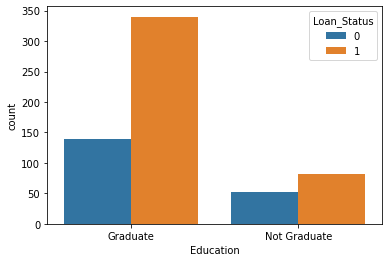

In [45]:
sns.countplot(x="Education", hue="Loan_Status", data=df)

In [46]:
#in both situation people ae getting the loan but people who are graduate are getting loan easier compared to other.

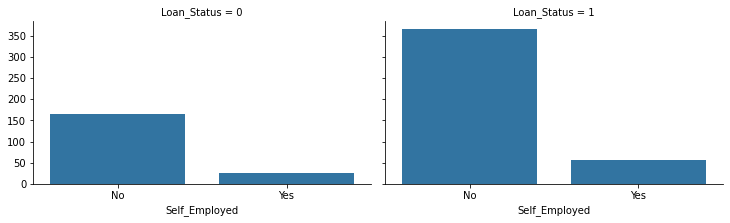

In [47]:
#Self_Employed vs Education
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed')

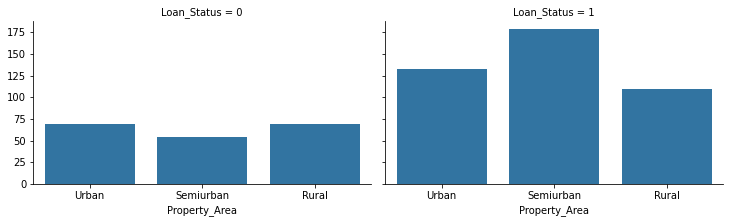

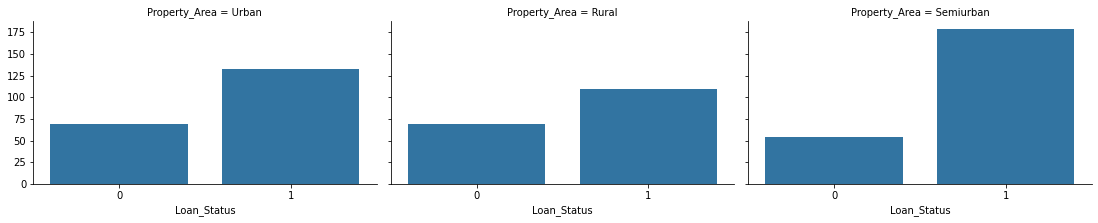

In [48]:
#people having job got loan easily

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Property_Area')

grid = sns.FacetGrid(df,col='Property_Area', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

In [49]:
# property area has impact on loan status

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

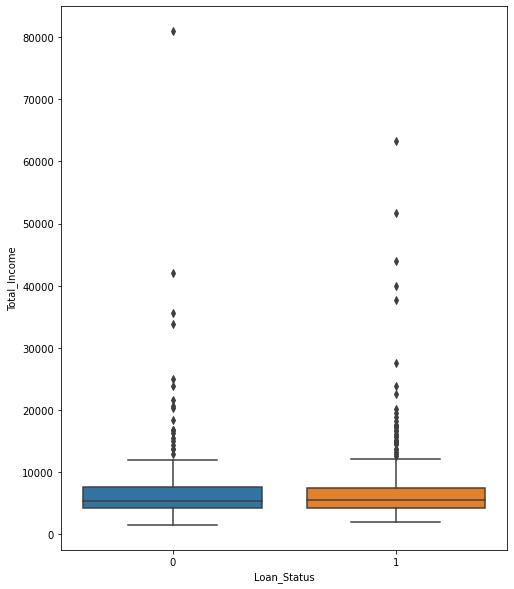

In [50]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Loan_Status",y="Total_Income", data=df)


In [51]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

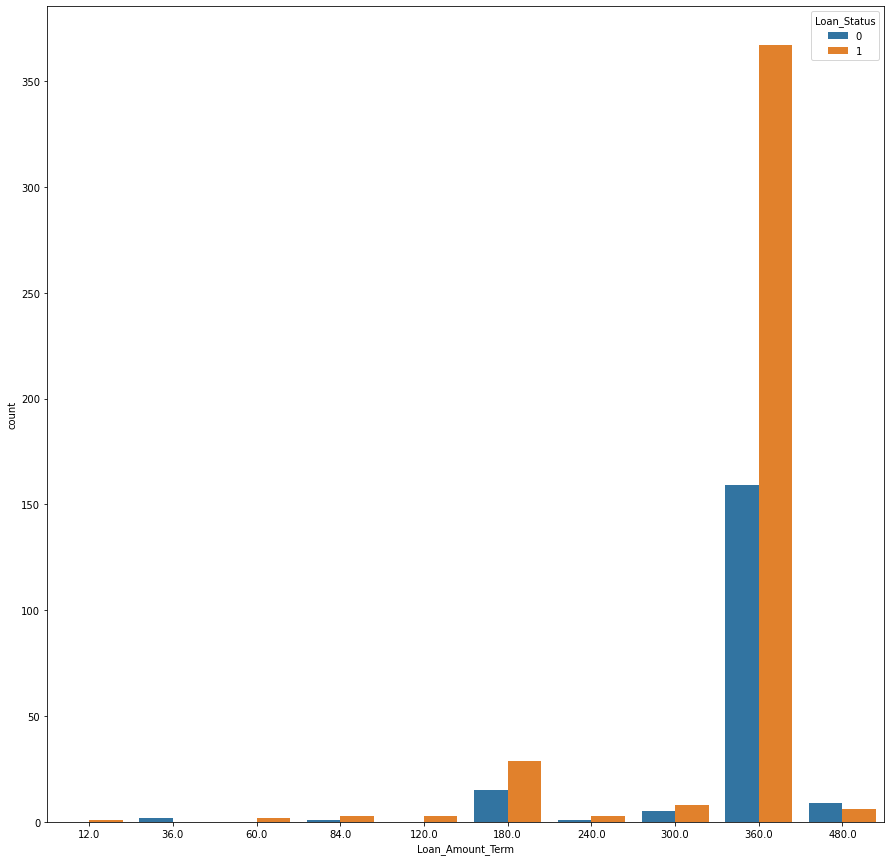

In [52]:
plt.figure(figsize=(15,15))
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df)


In [53]:
df = df.drop(columns='Loan_Amount_Term', axis=1)

In [54]:
df['LoanAmount'].unique()


array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

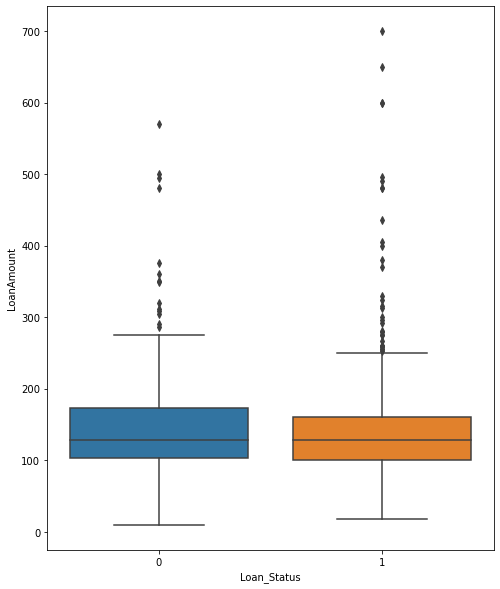

In [55]:
 plt.figure(figsize=(8,10))
sns.boxplot(x="Loan_Status",y="LoanAmount", data=df)

In [56]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  Total_Income       614 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [57]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID']
#cols =['Loan_ID','Dependents','Credit_History','CoapplicantIncome','ApplicantIncome']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,1.0,Urban,1,6000.0


In [58]:
df['Dependents'] = df['Dependents'].astype(int)

In [59]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [60]:

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          614 non-null    int32  
 1   Married         614 non-null    int32  
 2   Dependents      614 non-null    int32  
 3   Education       614 non-null    int32  
 4   Self_Employed   614 non-null    int32  
 5   LoanAmount      614 non-null    float64
 6   Credit_History  614 non-null    float64
 7   Property_Area   614 non-null    int32  
 8   Loan_Status     614 non-null    int64  
 9   Total_Income    614 non-null    float64
dtypes: float64(3), int32(6), int64(1)
memory usage: 33.7 KB


In [61]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']


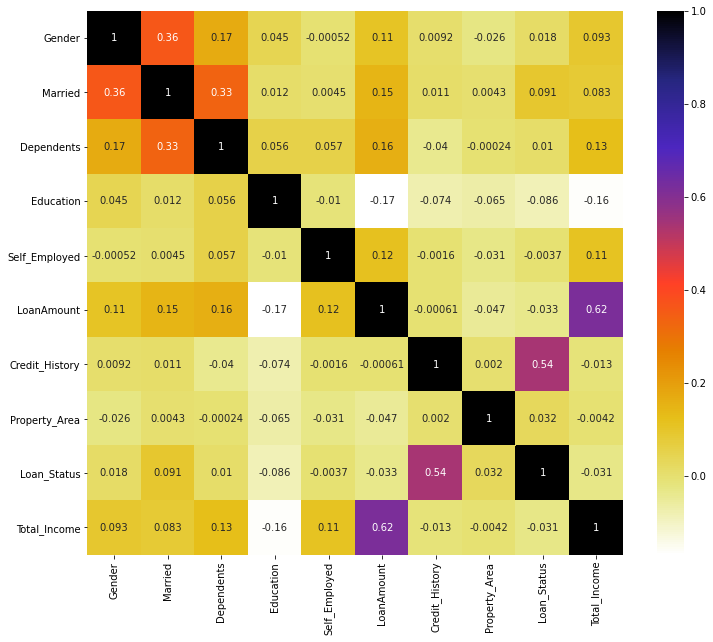

In [62]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [63]:
# classify function
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
def classify(model, x, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)
   

In [64]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1, X,y)


Accuracy is 77.83783783783784
Cross validation is 77.34372917499665


In [65]:
from sklearn.metrics import confusion_matrix
y_pred1 = model1.predict(x_test)


In [66]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[ 27,  38],
       [  3, 117]], dtype=int64)

<AxesSubplot:>

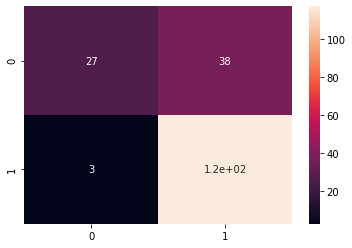

In [67]:
sns.heatmap(cm1, annot=True)

In [70]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
classify(model2, X, y)

Accuracy is 80.0
Cross validation is 76.71598027455686


In [72]:
y_pred2 = model2.predict(x_test)

In [73]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[ 33,  32],
       [  5, 115]], dtype=int64)

<AxesSubplot:>

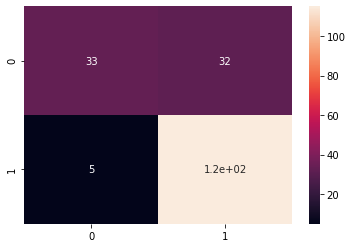

In [74]:
sns.heatmap(cm2, annot=True)

In [75]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
classify(model3,X,y)

Accuracy is 75.13513513513513
Cross validation is 68.72717579634812


In [76]:
y_pred3 = model3.predict(x_test)

In [77]:
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[40, 25],
       [21, 99]], dtype=int64)

<AxesSubplot:>

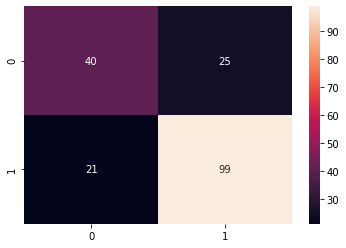

In [78]:
sns.heatmap(cm3, annot=True)

In [103]:
import pickle

In [105]:
# Saving model to disk
pickle.dump(model3, open('model2.pkl','wb'))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          614 non-null    int32  
 1   Married         614 non-null    int32  
 2   Dependents      614 non-null    int32  
 3   Education       614 non-null    int32  
 4   Self_Employed   614 non-null    int32  
 5   LoanAmount      614 non-null    float64
 6   Credit_History  614 non-null    float64
 7   Property_Area   614 non-null    int32  
 8   Loan_Status     614 non-null    int64  
 9   Total_Income    614 non-null    float64
dtypes: float64(3), int32(6), int64(1)
memory usage: 33.7 KB


In [179]:
# Loading model to compare the results
model = pickle.load(open('model2.pkl','rb'))
print(model.predict([[0,0,0,0,0,60,1,0,10]]))

[1]
